###Importing Data

In [33]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

###Data Loading, Reading & Details

In [2]:
data = '/content/drive/MyDrive/DataMining Project/Kaagle_Upload.csv'

In [3]:
dataset = pd.read_csv(data)
dataset.tail()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,55) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,accident_index,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,1st_point_of_impact,was_vehicle_left_hand_drive?,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_(cc),propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type,vehicle_imd_decile,NUmber_of_Casualities_unique_to_accident_index,No_of_Vehicles_involved_unique_to_accident_index,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_(district),local_authority_(highway),1st_road_class,1st_road_number,road_type,speed_limit,junction_detail,junction_control,2nd_road_class,2nd_road_number,pedestrian_crossing-human_control,pedestrian_crossing-physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,lsoa_of_accident_location,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
285326,2015984141415,9,9,0,18,0,0,1,0,0,0,1,1,6,1,57,9,1242,1,1,-1,1,-1,7,13,314050.0,579638.0,-3.348646,55.103676,98,3,13,7,31/12/2015,5,1899-12-30 16:37:00,917,S12000006,2,74,3,70,0,-1,-1,0,0,0,6,3,4,0,0,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285327,2015984141415,10,9,0,18,0,0,1,0,1,0,2,1,6,1,19,4,1422,2,-1,-1,2,-1,7,13,314050.0,579638.0,-3.348646,55.103676,98,3,13,7,31/12/2015,5,1899-12-30 16:37:00,917,S12000006,2,74,3,70,0,-1,-1,0,0,0,6,3,4,0,0,2,1,NaN,3.0,1.0,1.0,19.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,2.0,5.0
285328,2015984141415,11,9,0,18,0,0,1,0,1,0,2,1,6,1,-1,-1,1596,1,5,-1,1,-1,7,13,314050.0,579638.0,-3.348646,55.103676,98,3,13,7,31/12/2015,5,1899-12-30 16:37:00,917,S12000006,2,74,3,70,0,-1,-1,0,0,0,6,3,4,0,0,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285329,2015984141415,12,9,0,18,0,0,1,0,0,0,2,1,6,1,29,6,1596,1,15,-1,3,-1,7,13,314050.0,579638.0,-3.348646,55.103676,98,3,13,7,31/12/2015,5,1899-12-30 16:37:00,917,S12000006,2,74,3,70,0,-1,-1,0,0,0,6,3,4,0,0,2,1,NaN,2.0,1.0,1.0,29.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,3.0,-1.0
285330,2015984141415,13,9,0,18,0,0,0,0,5,7,1,1,6,2,17,4,1199,1,12,-1,1,-1,7,13,314050.0,579638.0,-3.348646,55.103676,98,3,13,7,31/12/2015,5,1899-12-30 16:37:00,917,S12000006,2,74,3,70,0,-1,-1,0,0,0,6,3,4,0,0,2,1,NaN,1.0,1.0,2.0,17.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,4.0


In [4]:
dataset.shape

(285331, 70)

In [5]:
dataset.columns

Index(['accident_index', 'vehicle_reference', 'vehicle_type',
       'towing_and_articulation', 'vehicle_manoeuvre',
       'vehicle_location-restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       '1st_point_of_impact', 'was_vehicle_left_hand_drive?',
       'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver',
       'age_band_of_driver', 'engine_capacity_(cc)', 'propulsion_code',
       'age_of_vehicle', 'driver_imd_decile', 'driver_home_area_type',
       'vehicle_imd_decile', 'NUmber_of_Casualities_unique_to_accident_index',
       'No_of_Vehicles_involved_unique_to_accident_index',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_(district)', 'local_authority_(highway)

In [6]:
dataset.values

array([['201506E098757', 2, 9, ..., nan, nan, nan],
       ['201506E098766', 1, 9, ..., nan, nan, nan],
       ['201506E098766', 2, 9, ..., 9.0, 1.0, 3.0],
       ...,
       ['2015984141415', 11, 9, ..., nan, nan, nan],
       ['2015984141415', 12, 9, ..., 9.0, 3.0, -1.0],
       ['2015984141415', 13, 9, ..., 9.0, 1.0, 4.0]], dtype=object)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285331 entries, 0 to 285330
Data columns (total 70 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   accident_index                                    285331 non-null  object 
 1   vehicle_reference                                 285331 non-null  int64  
 2   vehicle_type                                      285331 non-null  int64  
 3   towing_and_articulation                           285331 non-null  int64  
 4   vehicle_manoeuvre                                 285331 non-null  int64  
 5   vehicle_location-restricted_lane                  285331 non-null  int64  
 6   junction_location                                 285331 non-null  int64  
 7   skidding_and_overturning                          285331 non-null  int64  
 8   hit_object_in_carriageway                         285331 non-null  int64  
 9   vehi

In [8]:
dataset.describe(include='all')

,accident_index,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,1st_point_of_impact,was_vehicle_left_hand_drive?,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_(cc),propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type,vehicle_imd_decile,NUmber_of_Casualities_unique_to_accident_index,No_of_Vehicles_involved_unique_to_accident_index,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_(district),local_authority_(highway),1st_road_class,1st_road_number,road_type,speed_limit,junction_detail,junction_control,2nd_road_class,2nd_road_number,pedestrian_crossing-human_control,pedestrian_crossing-physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,lsoa_of_accident_location,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
count,285331,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.0,285331.000000,285331.0,285331.000000,285331.000000,285270.000000,2.852700e+05,285270.000000,285270.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331,285331.000000,285298,285331.000000,285331,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,268252,186072.000000,186072.000000,186072.000000,186072.000000,186072.000000,186072.000000,186072.000000,186072.000000,186072.000000,186072.000000,186072.000000,186072.000000,186072.000000,186072.000000
unique,139974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,365,NaN,1439,NaN,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,201543P296025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42045,NaN,1899-12-30 17:00:00,NaN,E10000016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E01032739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1111,NaN,2725,NaN,8868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.557030,9.570765,0.026741,12.625323,0.124038,2.700075,0.200041,0.340356,0.377502,0.590244,1.806172,0.997235,4.793408,1.400903,35.682502,6.021116,1390.297462,0.829556,5.270209,-1.0,0.919308,-1.0,1.613239,2.109648,446477.584008,2.899509e+05,-1.336064,52.497308,29.903347,2.837024,2.109648,1.613239,NaN,4.097687,NaN,344.610740,NaN,4.005499,972.124382,5.112375,39.059513,2.320708,1.803137,2.742212,369.959538,0.006095,0.793678,1.930253,1.494657,1.291602,0.097473,0.054877,1.361825,1.186391,NaN,1.414899,1.482394,1.406547,36.096570,6.245512,2.862462,0.672277,0.481631,0.255992,0.079383,0.060428,7.277414,1.045665,3.848236
std,NaN,0.760106,8.515910,0.289672,6.191873,0.965362,3.270800,0.748732,1.679784,1

###Dropping rows with missing values

In [41]:
df=dataset.dropna() # The dataset is huge, therefore, dropping any rows with missing values is fine
df.head()

,accident_index,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,1st_point_of_impact,was_vehicle_left_hand_drive?,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_(cc),propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type,vehicle_imd_decile,NUmber_of_Casualities_unique_to_accident_index,No_of_Vehicles_involved_unique_to_accident_index,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_(district),local_authority_(highway),1st_road_class,1st_road_number,road_type,speed_limit,junction_detail,junction_control,2nd_road_class,2nd_road_number,pedestrian_crossing-human_control,pedestrian_crossing-physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,lsoa_of_accident_location,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,201506E098757,2,9,0,18,0,8,0,0,0,0,3,1,6,1,45,7,1794,1,11,-1,1,-1,1,2,384980.0,394830.0,-2.227629,53.450014,6,3,2,1,42250,2,1899-12-30 12:56:00,102,E08000003,5,0,6,30,3,4,6,0,0,0,1,1,1,0,0,1,2,E01005288,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0
1,201506E098766,1,9,0,9,0,8,0,0,0,0,4,1,6,2,25,5,1582,2,1,-1,-1,-1,1,2,383870.0,394420.0,-2.244322,53.446296,6,3,2,1,14/03/2015,7,1899-12-30 15:55:00,102,E08000003,3,5103,3,40,6,2,5,0,0,5,1,1,1,0,0,1,1,E01005178,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0
2,201506E098766,2,9,0,18,0,8,0,0,0,0,1,1,6,1,51,8,-1,-1,-1,-1,1,-1,1,2,383870.0,394420.0,-2.244322,53.446296,6,3,2,1,14/03/2015,7,1899-12-30 15:55:00,102,E08000003,3,5103,3,40,6,2,5,0,0,5,1,1,1,0,0,1,1,E01005178,1.0,1.0,1.0,51.0,8.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,3.0
3,201506E098777,1,20,0,4,0,0,0,0,0,0,1,1,1,1,50,8,4462,2,1,-1,1,-1,1,1,386710.0,395700.0,-2.201617,53.457881,6,3,1,1,42311,4,1899-12-30 10:15:00,102,E08000003,3,6,6,30,0,-1,-1,0,0,4,1,1,1,0,0,1,1,E01005232,1.0,3.0,2.0,34.0,6.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,201506E098780,1,9,0,15,0,1,0,0,0,0,4,1,6,1,27,6,1598,2,-1,-1,1,-1,1,2,384280.0,395200.0,-2.238188,53.453319,6,3,2,1,42158,6,1899-12-30 08:03:00,102,E08000003,5,0,6,30,3,4,6,0,0,0,1,1,1,0,0,1,2,E01005242,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0


In [45]:
df1 = df[['special_conditions_at_site','pedestrian_movement','road_surface_conditions','light_conditions','weather_conditions',
          'age_of_vehicle','sex_of_driver','age_of_driver','junction_location', 'junction_detail','junction_control',
          'did_police_officer_attend_scene_of_accident','day_of_week','accident_severity']]

###Dropping unnecessary data and selecting necessary ones

In [46]:
df1.replace(-1, np.nan, inplace=True) # -1 should be imputed to NaN to be recognized as missing in the next row
df1=df1.dropna() # We'll drop all the rows with missing data once again
df1.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


(110819, 14)

In [47]:
df1.head()

,special_conditions_at_site,pedestrian_movement,road_surface_conditions,light_conditions,weather_conditions,age_of_vehicle,sex_of_driver,age_of_driver,junction_location,junction_detail,junction_control,did_police_officer_attend_scene_of_accident,day_of_week,accident_severity
0,0.0,999.0,1.0,1,1,11.0,1.0,45.0,8.0,3.0,4.0,2.0,2,3
1,0.0,999.0,1.0,1,1,1.0,2.0,25.0,8.0,6.0,2.0,1.0,7,3
6,0.0,0.0,1.0,7,1,8.0,2.0,27.0,2.0,6.0,2.0,1.0,5,3
7,0.0,999.0,1.0,7,1,10.0,1.0,33.0,2.0,6.0,2.0,1.0,5,3
8,0.0,2.0,1.0,1,1,1.0,1.0,24.0,1.0,3.0,2.0,1.0,5,3


### Heat map of correlations

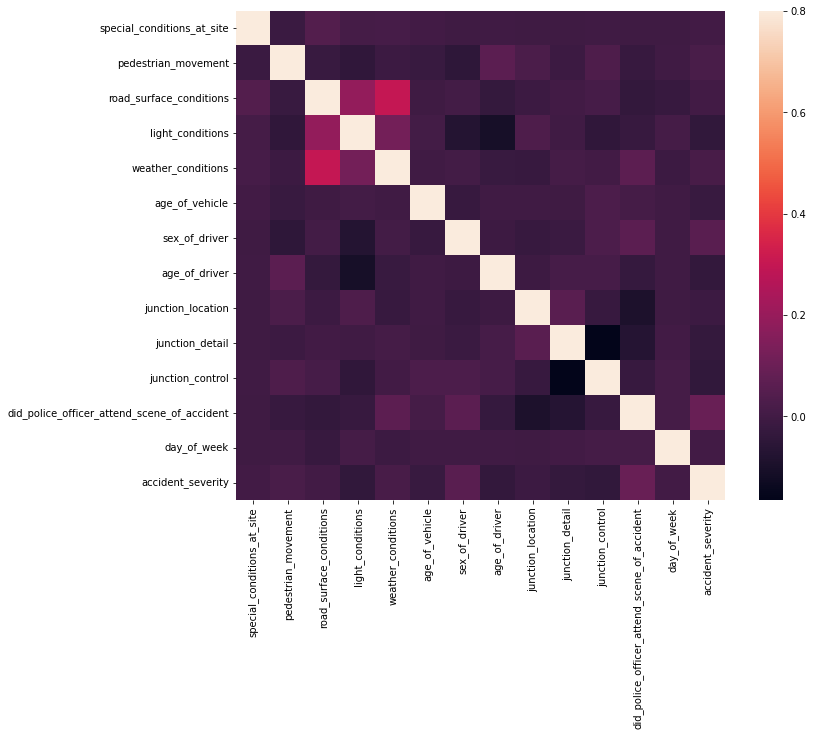

In [48]:
import matplotlib.pyplot as plt
corrmat = df1.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

plt.show()

### histogram & normal probability plot for effect of "age of driver" on accidents 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


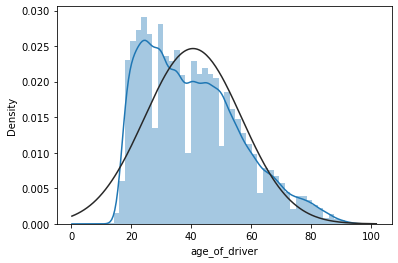

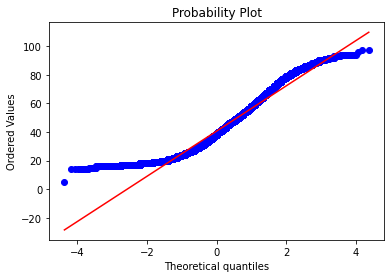

In [49]:
from scipy.stats import norm
from scipy import stats
#histogram and normal probability plot
sns.distplot(df1['age_of_driver'], fit=norm);
fig = plt.figure()
res = stats.probplot(df1['age_of_driver'], plot=plt)
plt.show()

### histogram & normal probability plot for effect of "age of vehicle" on accidents 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


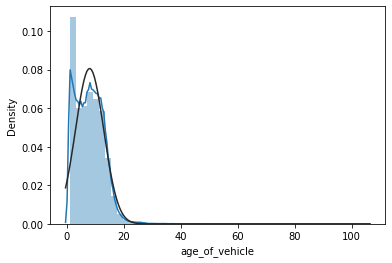

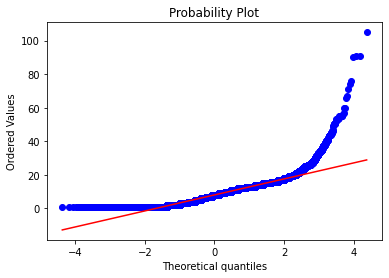

In [50]:

from scipy.stats import norm
from scipy import stats
#histogram and normal probability plot
sns.distplot(df1['age_of_vehicle'], fit=norm);
fig = plt.figure()
res = stats.probplot(df1['age_of_vehicle'], plot=plt)
plt.show()

### histogram & normal probability plot for effect of "light conditions" on accidents 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


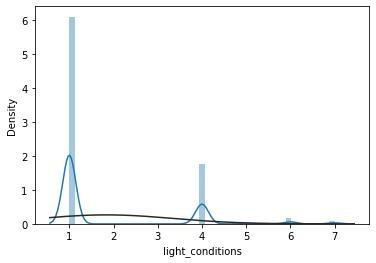

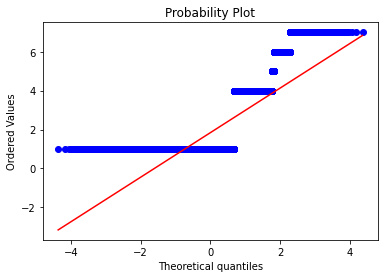

In [51]:

from scipy.stats import norm
from scipy import stats
#histogram and normal probability plot
sns.distplot(df1['light_conditions'], fit=norm);
fig = plt.figure()
res = stats.probplot(df1['light_conditions'], plot=plt)
plt.show()

### histogram & normal probability plot for effect of "road surface conditions" on accidents 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


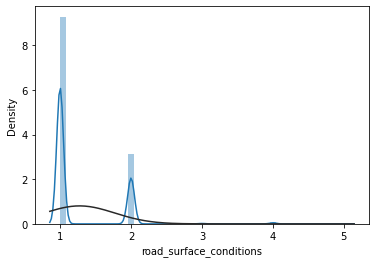

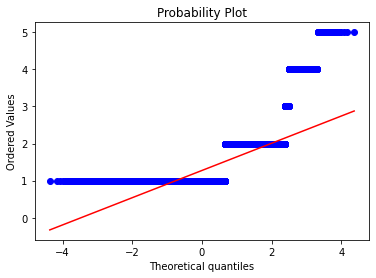

In [52]:

from scipy.stats import norm
from scipy import stats
#histogram and normal probability plot
sns.distplot(df1['road_surface_conditions'], fit=norm);
fig = plt.figure()
res = stats.probplot(df1['road_surface_conditions'], plot=plt)
plt.show()

In [57]:
df1= df1[:15000] #keep 1500 to decrease running times

Y1 = df1.accident_severity.values


In [58]:

X1 = df1.loc[:, df1.columns != 'accident_severity']
X1.columns;
X1.head()

,special_conditions_at_site,pedestrian_movement,road_surface_conditions,light_conditions,weather_conditions,age_of_vehicle,sex_of_driver,age_of_driver,junction_location,junction_detail,junction_control,did_police_officer_attend_scene_of_accident,day_of_week
0,0.0,999.0,1.0,1,1,11.0,1.0,45.0,8.0,3.0,4.0,2.0,2
1,0.0,999.0,1.0,1,1,1.0,2.0,25.0,8.0,6.0,2.0,1.0,7
6,0.0,0.0,1.0,7,1,8.0,2.0,27.0,2.0,6.0,2.0,1.0,5
7,0.0,999.0,1.0,7,1,10.0,1.0,33.0,2.0,6.0,2.0,1.0,5
8,0.0,2.0,1.0,1,1,1.0,1.0,24.0,1.0,3.0,2.0,1.0,5


In [60]:
X1.shape


(15000, 13)

In [61]:
Y1.shape

(15000,)

### Importing Classifiers

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


###Data Spliting

In [63]:
X_train1, X_test1,Y_train1,Y_test1 = train_test_split(X1, Y1, test_size=0.33, random_state=99)

###Implementing Machine Learning Algorithms 
1. KNN
2. Logistic Regression
3. Gaussian Naive Bayes
4. Stochastic Gradient Descent
5. Decision Tree
6. Random Forest


In [64]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train1, Y_train1)
Y_pred = knn.predict(X_test1)
acc_knn1 = round(knn.score(X_test1, Y_test1) * 100, 2)
acc_knn1


# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train1, Y_train1)
Y_pred = logreg.predict(X_test1)
acc_log1 = round(logreg.score(X_train1, Y_train1) * 100, 2)
acc_log1

# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train1, Y_train1)
Y_pred = gaussian.predict(X_test1)
acc_gaussian1 = round(gaussian.score(X_test1, Y_test1) * 100, 2)
acc_gaussian1


# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train1, Y_train1)
Y_pred = sgd.predict(X_test1)
acc_sgd1 = round(sgd.score(X_test1, Y_test1) * 100, 2)
acc_sgd1

# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train1, Y_train1)
Y_pred = decision_tree.predict(X_test1)
acc_decision_tree1 = round(decision_tree.score(X_test1, Y_test1) * 100, 2)
acc_decision_tree1

# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train1, Y_train1)
Y_pred = random_forest.predict(X_test1)
random_forest.score(X_train1, Y_train1)
acc_random_forest1 = round(random_forest.score(X_test1, Y_test1) * 100, 2)
acc_random_forest1

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


92.73

### Printing and Comparing accuracies

In [67]:
print("Machine Learning algorithm scores ")
models = pd.DataFrame({
    'Model': [ 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent',
              'Decision Tree'],
    'Score': [ acc_knn1, acc_log1, 
              acc_random_forest1, acc_gaussian1, 
              acc_sgd1,  acc_decision_tree1]})
models.sort_values(by='Score', ascending=False)

Machine Learning algorithm scores 


,Model,Score
1,Logistic Regression,92.74
2,Random Forest,92.73
0,KNN,90.85
5,Decision Tree,86.61
4,Stochastic Gradient Decent,81.37
3,Naive Bayes,64.91
